# Абстрактная фабрика

Абстрактная фабрика — это порождающий паттерн проектирования, который позволяет создавать семейства связанных объектов, не привязываясь к конкретным классам создаваемых объектов.

## Проблема
Представьте, что вы пишете симулятор мебельного магазина. Ваш код содержит:

1. Семейство зависимых продуктов. Скажем, Кресло + Диван + Столик .
2. Несколько вариаций этого семейства. Например, продукты Кресло , Диван и Столик представлены в трёх разных стилях: Ар-деко , Викторианском и Модерне.

Вам нужен такой способ создавать объекты продуктов, чтобы они сочетались с другими продуктами того же семейства. Это важно, так как клиенты расстраиваются, если получают несочетающуюся мебель.

Кроме того, вы не хотите вносить изменения в существующий код при добавлении новых продуктов или семейств в программу. Поставщики часто обновляют свои каталоги, и вам бы не хотелось менять уже написанный код при получении новых моделей мебели.

# Структура
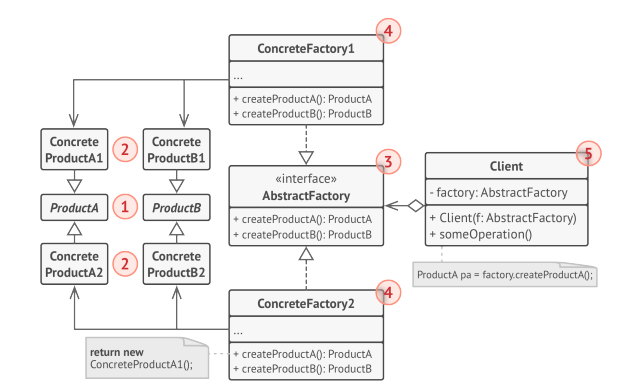

1. Абстрактные продукты объявляют интерфейсы продуктов, которые связаны друг с другом по смыслу, но выполняют разные функции.
2. Конкретные продукты — большой набор классов, которые относятся к различным абстрактным продуктам (кресло/столик), но имеют одни и те же вариации (Викториан./Модерн).
3. Абстрактная фабрика объявляет методы создания различных абстрактных продуктов (кресло/столик).
4. Конкретные фабрики относятся каждая к своей вариации продуктов (Викториан./Модерн) и реализуют методы абстрактной фабрики, позволяя создавать все продукты определённой вариации.
5. Несмотря на то, что конкретные фабрики порождают конкретные продукты, сигнатуры их методов должны возвращать соответствующие абстрактные продукты. Это позволит клиентскому коду, использующему фабрику, не привязываться к конкретным классам продуктов. Клиент сможет работать с любыми вариациями продуктов через абстрактные интерфейсы.

In [2]:
class ProductA:
    def do_stuff(self):
        pass


class ProductB:
    def do_stuff(self):
        pass


class ConcreteProductA1(ProductA):
    def do_stuff(self):
        print(self, 'do stuff')


class ConcreteProductA2(ProductA):
    def do_stuff(self):
        print(self, 'do stuff')


class ConcreteProductB1(ProductB):
    def do_stuff(self):
        print(self, 'do stuff')


class ConcreteProductB2(ProductB):
    def do_stuff(self):
        print(self, 'do stuff')

        
class Factory:
    def create_product_a(self):
        pass

    def create_product_b(self):
        pass


class ConcreteFactory1(Factory):
    def create_product_a(self):
        print(self, 'create product a')
        return ConcreteProductA1()

    def create_product_b(self):
        print(self, 'create product b')
        return ConcreteProductB1()

    
class ConcreteFactory2(Factory):
    def create_product_a(self):
        print(self, 'create product a')
        return ConcreteProductA2()

    def create_product_b(self):
        print(self, 'create product b')
        return ConcreteProductB2()


class Application:
    factory_by_type = {
        '1': ConcreteFactory1,
        '2': ConcreteFactory2,
        'default': ConcreteFactory1,
    }
    def __init__(self, factory_type='default'):
        Factory = self.factory_by_type.get(factory_type, 'default')
        self.factory = Factory()
    
    def do_stuff(self):
        product_a = self.factory.create_product_a()
        product_a.do_stuff()
        product_b = self.factory.create_product_b()
        product_b.do_stuff()


app = Application(factory_type='2')
app.do_stuff()

<__main__.ConcreteFactory2 object at 0x7fc0bb428b38> create product a
<__main__.ConcreteProductA2 object at 0x7fc0bb428c18> do stuff
<__main__.ConcreteFactory2 object at 0x7fc0bb428b38> create product b
<__main__.ConcreteProductB2 object at 0x7fc0bb47bf28> do stuff


# Применимость

## Когда бизнес-логика программы должна работать с разными видами связанных друг с другом продуктов, не завися от конкретных классов продуктов.


Абстрактная фабрика скрывает от клиентского кода подробности того, как и какие конкретно объекты будут созданы. Но при этом клиентский код может работать со всеми типами создаваемых продуктов, так как их общий интерфейс был заранее определён.

## Когда в программе уже используется Фабричный метод, но очередные изменения предполагают введение новых типов продуктов.

В хорошей программе, каждый класс отвечает только за одну вещь. Если класс имеет слишком много фабричных методов, они способны затуманить его основную функцию. Поэтому имеет смысл вынести всю логику создания продуктов в отдельную иерархию классов, применив абстрактную фабрику.

# Преимущества

- Гарантирует сочетаемость создаваемых продуктов.
- Избавляет клиентский код от привязки к конкретным классам продуктов.
- Выделяет код производства продуктов в одно место, упрощая поддержку кода.
- Упрощает добавление новых продуктов в программу.
- Реализует принцип открытости/закрытости.

# Недостатки
- Усложняет код программы за счёт множества дополнительных классов.
- Требует наличия всех типов продуктов в каждой вариации.